#Desafio Visão Computacional V2
Este modelo possui uma melhor precisão devido ao uso do hardware correto (GPU) e maior dataset (6 vezes maior) com melhor qualidade de anotações (no formato YOLOV8, sem necessidade de conversão).

Os dados foram extraídos de [1] e o código adaptado de [2]

In [2]:
# Baixando dataset direto do site

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZxXOZiDBHhAu0VH8KgN7")
project = rf.workspace("felipe-estrella-0lysy").project("motel-placas")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to MOTEL-PLACAS-1 in yolov8:: 100%|██████████| 5296/5296 [00:01<00:00, 4338.77it/s]


In [3]:
# Baixando ultralytics
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 27.7 MB/s eta 0:00:00


In [5]:
# Treinando o modelo
from ultralytics import YOLO

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/MOTEL-PLACAS-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

In [6]:
# Salvando o modelo
!scp -r /content/runs '/content/drive/MyDrive'

#Resultados
Nesta seção serão plotados a matriz de confusão, um batch de resultados de validação e uma inferência com uma imagem da web

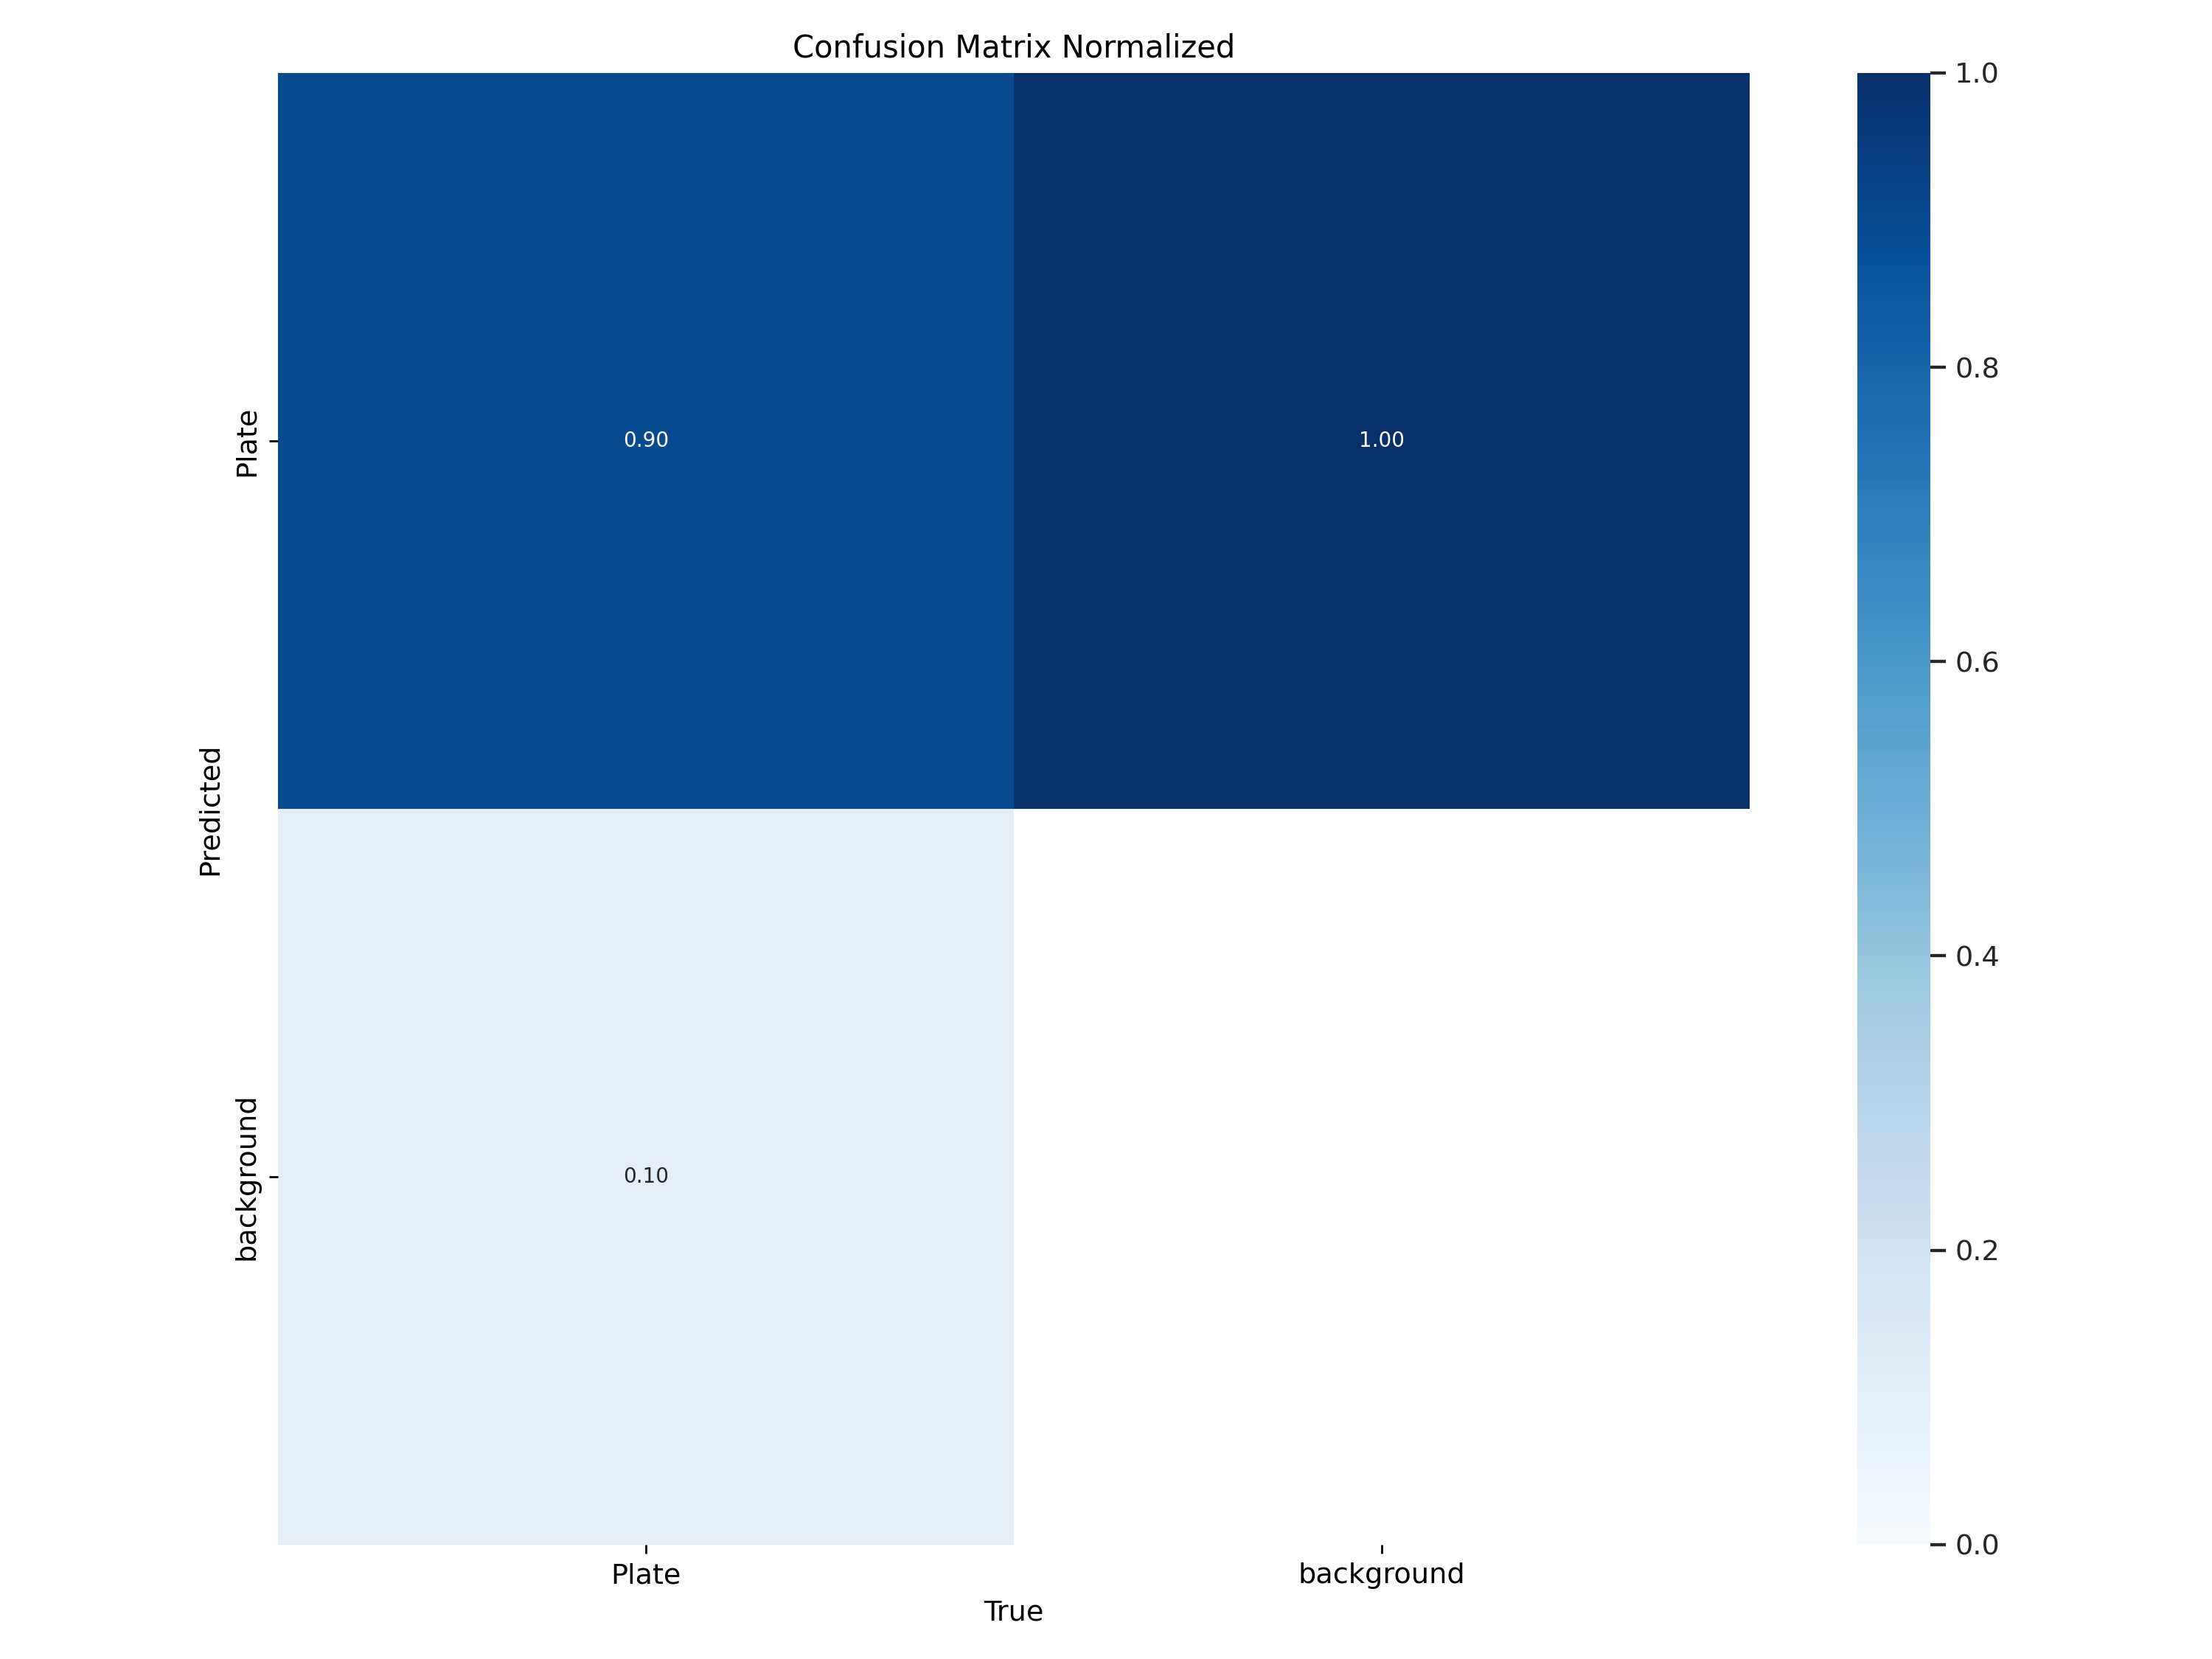

In [8]:
# Plotando matriz de confusão normalizada
from IPython.display import display, Image

Image(filename='/content/runs/detect/train2/confusion_matrix_normalized.png', width=600)

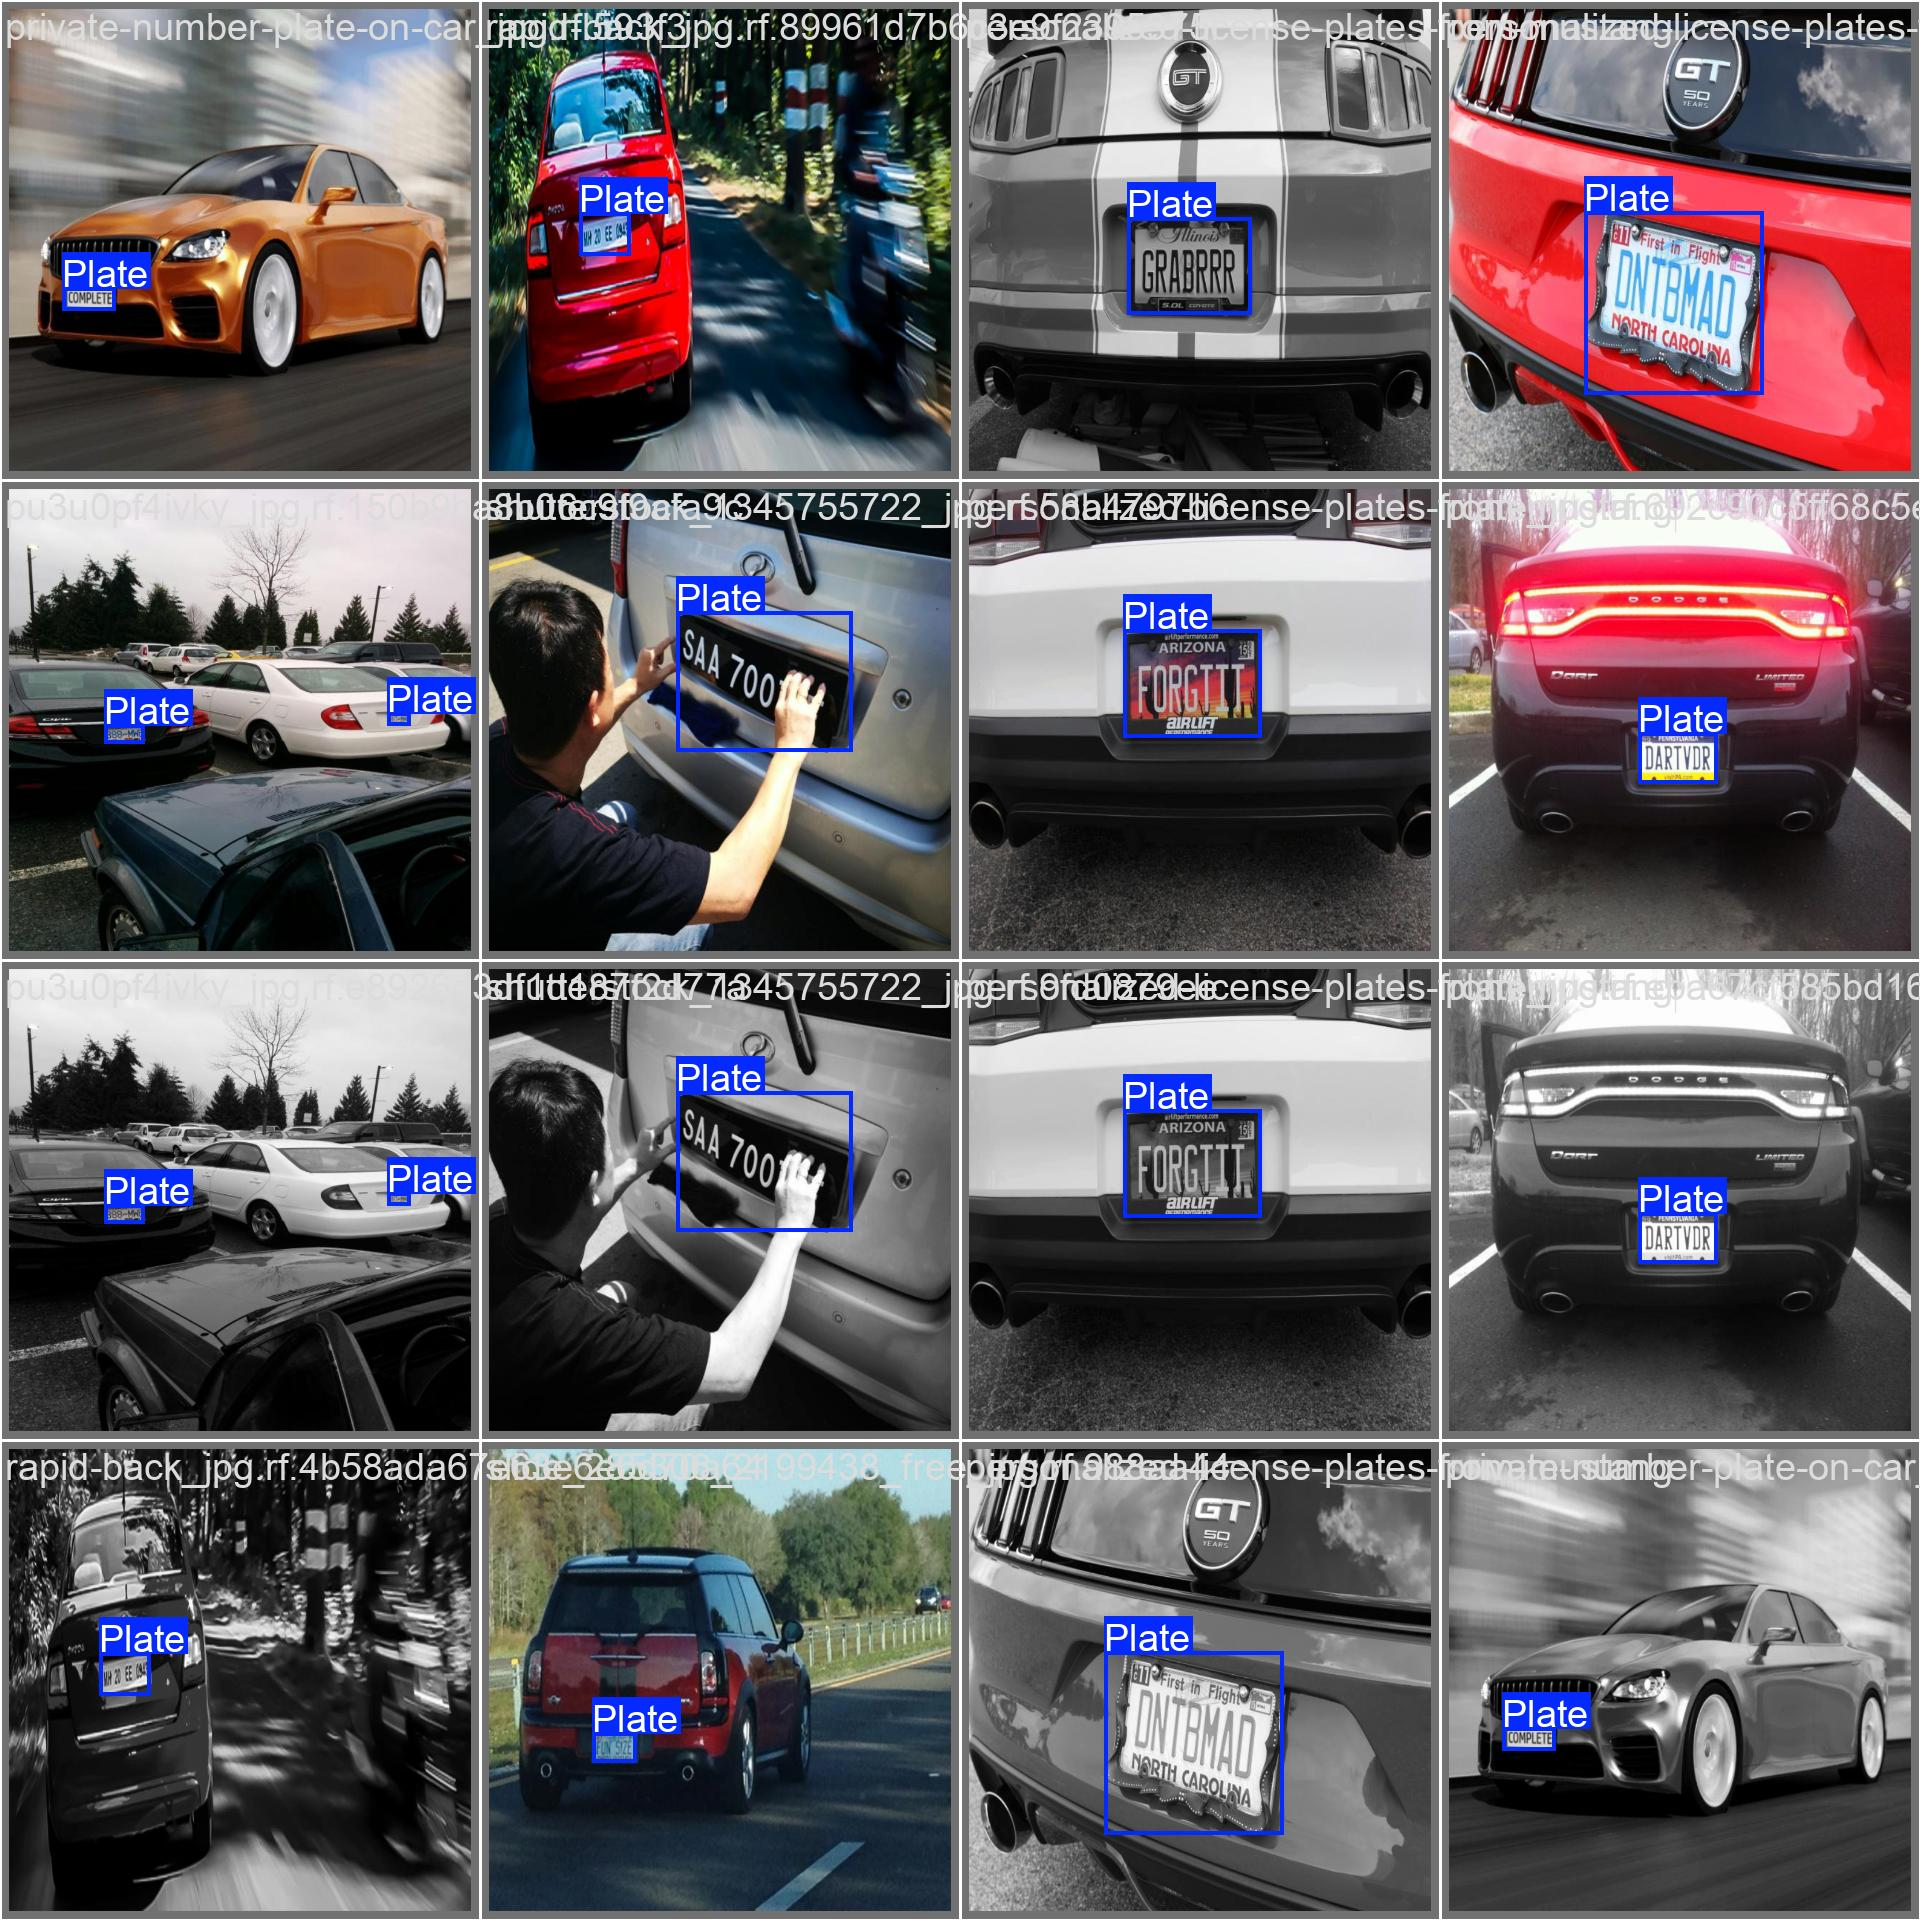

In [9]:
# Plotando resultados com dataset de validação

Image(filename='/content/runs/detect/train2/val_batch0_labels.jpg', width=600)


0: 608x800 2 Plates, 19.1ms
Speed: 4.4ms preprocess, 19.1ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


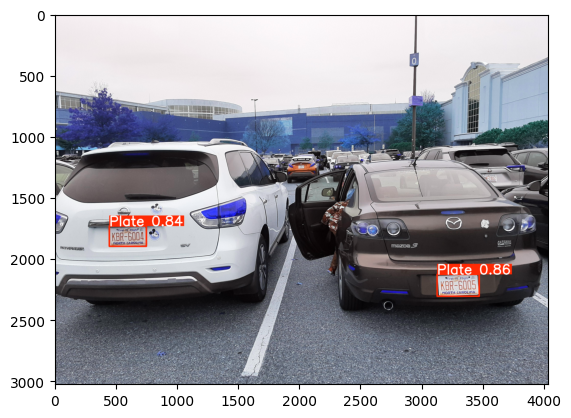

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

# Carregar o modelo YOLOv8 pré-treinado
model_path = '/content/runs/detect/train2/weights/best.pt'
model = YOLO(model_path)

# Fazer inferência com imagem da web
image_url = 'https://i.redd.it/kht6qtdh9ww91.jpg'
image = Image.open(requests.get(image_url, stream=True).raw)
results = model(image)

# Plotar a imagem com os bounding boxes
plt.imshow(results[0].plot(show=False))
plt.show()

#Discussão
Como visto, um maior dataset (600% maior) com melhor qualidade de anotações permitiu uma acurácia superior de 90% de acordo com a matriz de confusão.

Além disso, com o hardware certo, são necessários poucas epochs e tempo de processamento para o treinamento correto do modelo. Nesta versão foram necessárias apenas 20 epochs em um total de 0.456 horas, ja na primeira versão foram 100 epochs totalizando 4.207 horas de treinamento com uma precisão próxima de zero.

#Referências
[1] ESTRELLA, Felipe. Motel Placas. 2024. Disponível em: https://universe.roboflow.com/felipe-estrella-0lysy/motel-placas/dataset/1. Acesso em: 20 set. 2024.

[2] ROBOFLOW-AI. Train YOLOv8 Object Detection on Custom Dataset. 2024. Disponível em: https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb. Acesso em: 20 set. 2024.